In [51]:
import requests

url = 'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=msft'

def get_yahoo_cookie():
    cookie = None

    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"

    headers = {user_agent_key: user_agent_value}
    response = requests.get(
        "https://fc.yahoo.com", headers=headers, allow_redirects=True
    )

    if not response.cookies:
        raise Exception("Failed to obtain Yahoo auth cookie.")

    cookie = list(response.cookies)[0]

    return cookie


def get_yahoo_crumb(cookie):
    crumb = None
    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"

    headers = {user_agent_key: user_agent_value}

    crumb_response = requests.get(
        "https://query1.finance.yahoo.com/v1/test/getcrumb",
        headers=headers,
        cookies={cookie.name: cookie.value},
        allow_redirects=True,
    )
    crumb = crumb_response.text

    if crumb is None:
        raise Exception("Failed to retrieve Yahoo crumb.")

    return crumb


cookie = get_yahoo_cookie()
crumb = get_yahoo_crumb(cookie)


In [52]:
headers = {
    "User-Agent": "Your User Agent",
    "Crumb": crumb
}

headers = {
    "User-Agent": "Your User Agent",
    "Crumb": crumb,
    "Cookie": f"A3={cookie}"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("Data received:", data)
else:
    print("Request failed with status code:", response.status_code)

Data received: {'esgChart': {'result': [{'peerGroup': 'Software & Services', 'symbolSeries': {'timestamp': [1409529600, 1412121600, 1414800000, 1417392000, 1420070400, 1422748800, 1425168000, 1427846400, 1430438400, 1433116800, 1435708800, 1438387200, 1441065600, 1443657600, 1446336000, 1448928000, 1451606400, 1454284800, 1456790400, 1459468800, 1462060800, 1464739200, 1467331200, 1470009600, 1472688000, 1475280000, 1477958400, 1480550400, 1483228800, 1485907200, 1488326400, 1491004800, 1493596800, 1496275200, 1498867200, 1501545600, 1504224000, 1506816000, 1509494400, 1512086400, 1514764800, 1517443200, 1519862400, 1522540800, 1525132800, 1527811200, 1530403200, 1533081600, 1535760000, 1538352000, 1541030400, 1543622400, 1546300800, 1548979200, 1551398400, 1554076800, 1556668800, 1559347200, 1561939200, 1564617600, 1567296000, 1569888000, 1572566400, 1575158400, 1577836800, 1580515200, 1583020800, 1585699200, 1588291200, 1590969600, 1593561600, 1596240000, 1598918400, 1601510400, 1604

In [53]:
print(response.json())

{'esgChart': {'result': [{'peerGroup': 'Software & Services', 'symbolSeries': {'timestamp': [1409529600, 1412121600, 1414800000, 1417392000, 1420070400, 1422748800, 1425168000, 1427846400, 1430438400, 1433116800, 1435708800, 1438387200, 1441065600, 1443657600, 1446336000, 1448928000, 1451606400, 1454284800, 1456790400, 1459468800, 1462060800, 1464739200, 1467331200, 1470009600, 1472688000, 1475280000, 1477958400, 1480550400, 1483228800, 1485907200, 1488326400, 1491004800, 1493596800, 1496275200, 1498867200, 1501545600, 1504224000, 1506816000, 1509494400, 1512086400, 1514764800, 1517443200, 1519862400, 1522540800, 1525132800, 1527811200, 1530403200, 1533081600, 1535760000, 1538352000, 1541030400, 1543622400, 1546300800, 1548979200, 1551398400, 1554076800, 1556668800, 1559347200, 1561939200, 1564617600, 1567296000, 1569888000, 1572566400, 1575158400, 1577836800, 1580515200, 1583020800, 1585699200, 1588291200, 1590969600, 1593561600, 1596240000, 1598918400, 1601510400, 1604188800, 1606780

In [54]:
base = response.json()["esgChart"]["result"][0]["symbolSeries"]

timestamps = base["timestamp"]
esg = base["esgScore"]

In [55]:
from datetime import datetime
dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

In [56]:
print(dates)

['2014-09-01 00:00:00', '2014-10-01 00:00:00', '2014-11-01 00:00:00', '2014-12-01 00:00:00', '2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00', '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00', '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00', '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00', '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00', '2016-04-01 00:00:00', '2016-05-01 00:00:00', '2016-06-01 00:00:00', '2016-07-01 00:00:00', '2016-08-01 00:00:00', '2016-09-01 00:00:00', '2016-10-01 00:00:00', '2016-11-01 00:00:00', '2016-12-01 00:00:00', '2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00', '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00', '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00', '2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-12-01 00:00:00', '2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00', '2018-04-0

In [57]:
print(esg)

[66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 72.0, 74.0, 73.0, 73.0, 72.95, 72.95, 72.05, 71.03, 71.03, 71.03, 70.28, 70.28, 71.18, 71.18, 71.38, 71.38, 71.49, 71.49, 71.49, 71.49, 71.74, 71.74, 71.74, 71.17, 71.17, 71.21, 71.21, 74.16, 74.16, 74.16, 74.16, 74.16, 74.16, 74.16, 74.16, 74.16, 74.16, 73.92, 74.15, 74.15, 74.15, 74.15, 74.15, 74.15, 74.15, 74.15, 74.55, 74.55, 74.65, 74.65, 74.8, 15.35, 15.35, 15.35, 15.55, None, None, None, 14.91, 14.91, None, 14.94, None, None, 14.74, 14.74, 14.74, None, 14.63, None, None, None, 13.26, None, None, None, None, 13.26, None, None, 13.75, None, None, 15.24]


In [58]:
import pandas as pd
df_esg = pd.DataFrame(list(zip(dates, esg)), columns=['Date', 'ESG'])

In [59]:
df_esg.head()

,Date,ESG
0,2014-09-01 00:00:00,66.0
1,2014-10-01 00:00:00,66.0
2,2014-11-01 00:00:00,66.0
3,2014-12-01 00:00:00,66.0
4,2015-01-01 00:00:00,66.0


In [60]:
df_esg.isnull().sum()

Date     0
ESG     18
dtype: int64

In [61]:
df_esg.sort_values(by='Date', inplace=True)

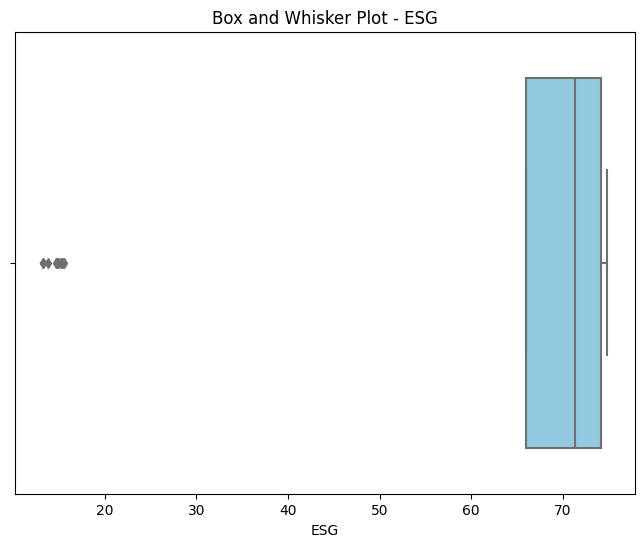

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_esg['ESG'], color='skyblue')

plt.title('Box and Whisker Plot - ESG')

plt.show()

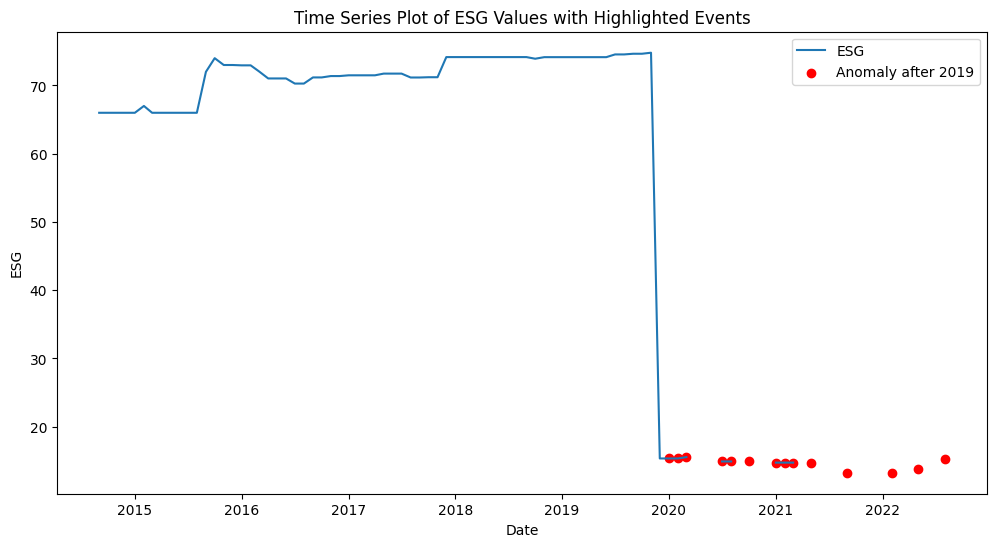

In [63]:
df_esg['Date'] = pd.to_datetime(df_esg['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df_esg['Date'], df_esg['ESG'], label='ESG')
plt.scatter(df_esg['Date'][df_esg['Date'].dt.year >= 2020], df_esg['ESG'][df_esg['Date'].dt.year >= 2020], color='red', label='Anomaly after 2019')
plt.xlabel('Date')
plt.ylabel('ESG')
plt.title('Time Series Plot of ESG Values with Highlighted Events')
plt.legend()
plt.show()

<ipython-input-64-91ace1187356>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_esg['ESG'], shade=True)


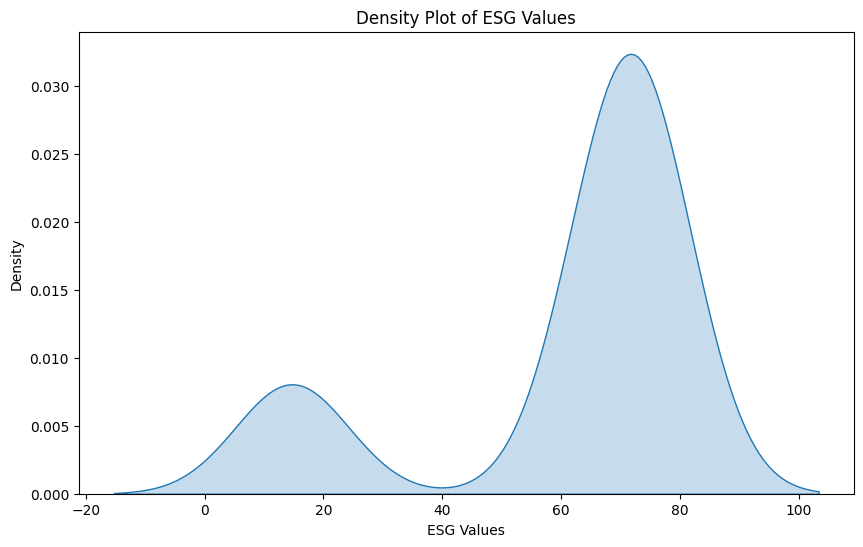

In [64]:
df_esg['Date'] = pd.to_datetime(df_esg['Date'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df_esg['ESG'], shade=True)
plt.xlabel('ESG Values')
plt.ylabel('Density')
plt.title('Density Plot of ESG Values')
plt.show()

In [65]:
df_esg

,Date,ESG
0,2014-09-01,66.00
1,2014-10-01,66.00
2,2014-11-01,66.00
3,2014-12-01,66.00
4,2015-01-01,66.00
...,...,...
91,2022-04-01,NaN
92,2022-05-01,13.75
93,2022-06-01,NaN
94,2022-07-01,NaN


In [66]:
segments = []
start_year = df_esg['Date'].dt.year.iloc[0]
end_year = 2019
segment_2019 = df_esg[(df_esg['Date'].dt.year >= start_year) & (df_esg['Date'].dt.year < end_year)]
segment_after_2020 = df_esg[(df_esg['Date'].dt.year >= end_year)]
segments.append(segment_2019)
segments.append(segment_after_2020)
start_year = end_year

print("null values before 2020 ")
print(segments[0].isnull().sum())

print("null values after 2020")
print(segments[1].isnull().sum())

segments[1]['ESG'] = segments[1]['ESG'].interpolate()

df_esg = pd.concat(segments, ignore_index = True)

df_esg

null values before 2020 
Date    0
ESG     0
dtype: int64
null values after 2020
Date     0
ESG     18
dtype: int64


<ipython-input-66-05a55a0046db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segments[1]['ESG'] = segments[1]['ESG'].interpolate()


,Date,ESG
0,2014-09-01,66.000000
1,2014-10-01,66.000000
2,2014-11-01,66.000000
3,2014-12-01,66.000000
4,2015-01-01,66.000000
...,...,...
91,2022-04-01,13.586667
92,2022-05-01,13.750000
93,2022-06-01,14.246667
94,2022-07-01,14.743333


In [68]:
df_copy = df_esg.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy.set_index('Date', inplace=True)

daily_esg = df_copy.resample('D').interpolate(method='linear')

In [69]:
df_main = pd.read_csv('/content/MSFT (2).csv')

In [70]:
df_main.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,106.029999,106.449997,105.419998,106.279999,100.307014,23628700
1,2018-08-02,105.400002,108.089996,104.839996,107.570000,101.524506,26104300
2,2018-08-03,107.800003,108.050003,106.820000,108.040001,101.968094,18659600
3,2018-08-06,108.120003,108.419998,107.559998,108.129997,102.053024,20265900
4,2018-08-07,108.559998,109.099998,108.169998,108.879997,102.760880,16080200


In [71]:
df_main.sort_values(by='Date', inplace=True)

In [72]:
df_main

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,106.029999,106.449997,105.419998,106.279999,100.307014,23628700
1,2018-08-02,105.400002,108.089996,104.839996,107.570000,101.524506,26104300
2,2018-08-03,107.800003,108.050003,106.820000,108.040001,101.968094,18659600
3,2018-08-06,108.120003,108.419998,107.559998,108.129997,102.053024,20265900
4,2018-08-07,108.559998,109.099998,108.169998,108.879997,102.760880,16080200
...,...,...,...,...,...,...,...
1001,2022-07-25,261.000000,261.500000,256.809998,258.829987,255.810410,21056000
1002,2022-07-26,259.859985,259.880005,249.570007,251.899994,248.961273,39348000
1003,2022-07-27,261.160004,270.049988,258.850006,268.739990,265.604797,45994000
1004,2022-07-28,269.750000,277.839996,267.869995,276.410004,273.185333,33459300


In [73]:
df_main.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

(array([17713., 17897., 18078., 18262., 18444., 18628., 18809., 18993.,
        19174.]),
 [Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07')])

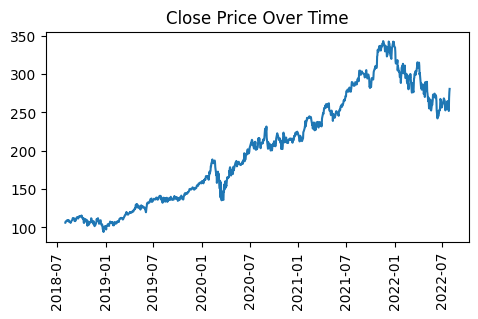

In [74]:
df_main['Date'] = pd.to_datetime(df_main['Date'])
plt.figure(figsize=(12, 6))
plt.subplot(2,2, 1)
plt.plot(df_main['Date'], df_main['Close'])
plt.title('Close Price Over Time')
plt.xticks(rotation=90)

In [75]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=df_main['Date'],
                open=df_main['Open'],
                high=df_main['High'],
                low=df_main['Low'],
                close=df_main['Close']))
legend_entry = go.Scatter(x=[None], y=[None], mode='markers',
                          marker=dict(color='rgba(0, 0, 0, 0)'),
                          name='Microsoft Stock: Open-High-Low-Close')

fig.add_trace(legend_entry)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02
))
fig.show()

**Line plot**

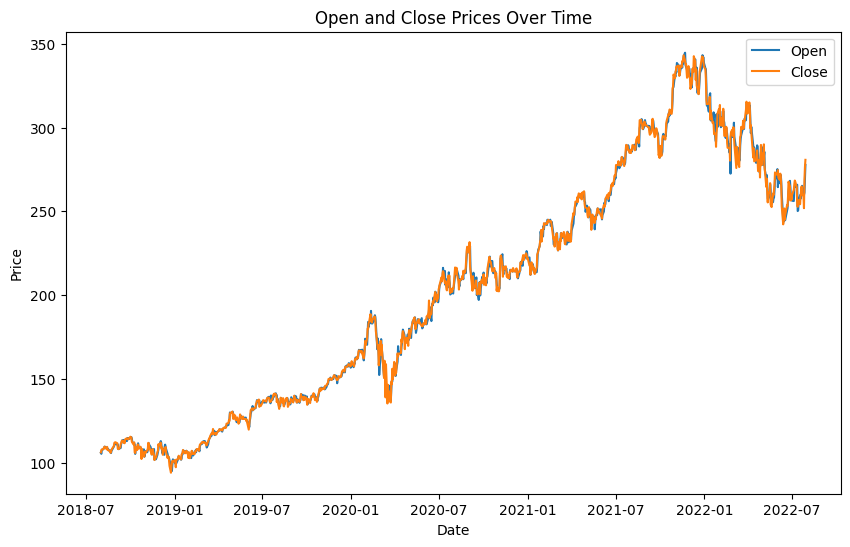

In [76]:
df_main['Date'] = pd.to_datetime(df_main['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df_main['Date'], df_main['Open'], label='Open')
plt.plot(df_main['Date'], df_main['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open and Close Prices Over Time')
plt.legend()
plt.show()

**Box plot**

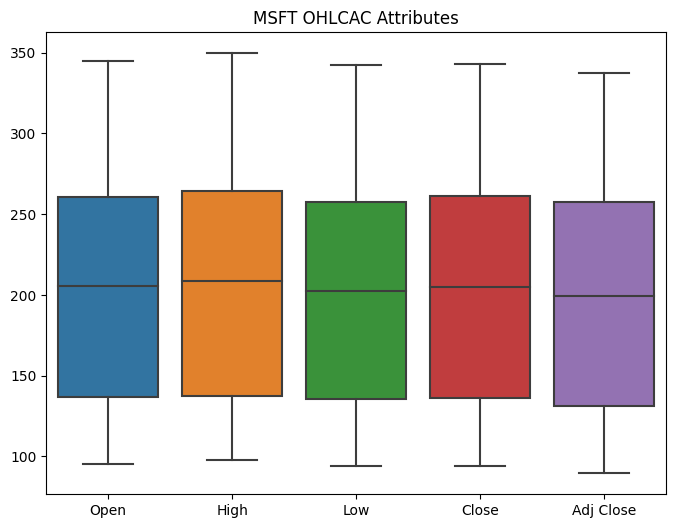

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_main[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title('MSFT OHLCAC Attributes')
plt.show()

In [78]:
filtered_df = daily_esg[daily_esg.index.isin(df_main['Date'])]
filtered_df = filtered_df.reset_index()
df_main['Date'] = pd.to_datetime(df_main['Date'])
merged_df = pd.merge(df_main, filtered_df, on='Date')
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,ESG
0,2018-08-01,106.029999,106.449997,105.419998,106.279999,100.307014,23628700,74.160000
1,2018-08-02,105.400002,108.089996,104.839996,107.570000,101.524506,26104300,74.160000
2,2018-08-03,107.800003,108.050003,106.820000,108.040001,101.968094,18659600,74.160000
3,2018-08-06,108.120003,108.419998,107.559998,108.129997,102.053024,20265900,74.160000
4,2018-08-07,108.559998,109.099998,108.169998,108.879997,102.760880,16080200,74.160000
...,...,...,...,...,...,...,...,...
1001,2022-07-25,261.000000,261.500000,256.809998,258.829987,255.810410,21056000,15.127849
1002,2022-07-26,259.859985,259.880005,249.570007,251.899994,248.961273,39348000,15.143871
1003,2022-07-27,261.160004,270.049988,258.850006,268.739990,265.604797,45994000,15.159892
1004,2022-07-28,269.750000,277.839996,267.869995,276.410004,273.185333,33459300,15.175914


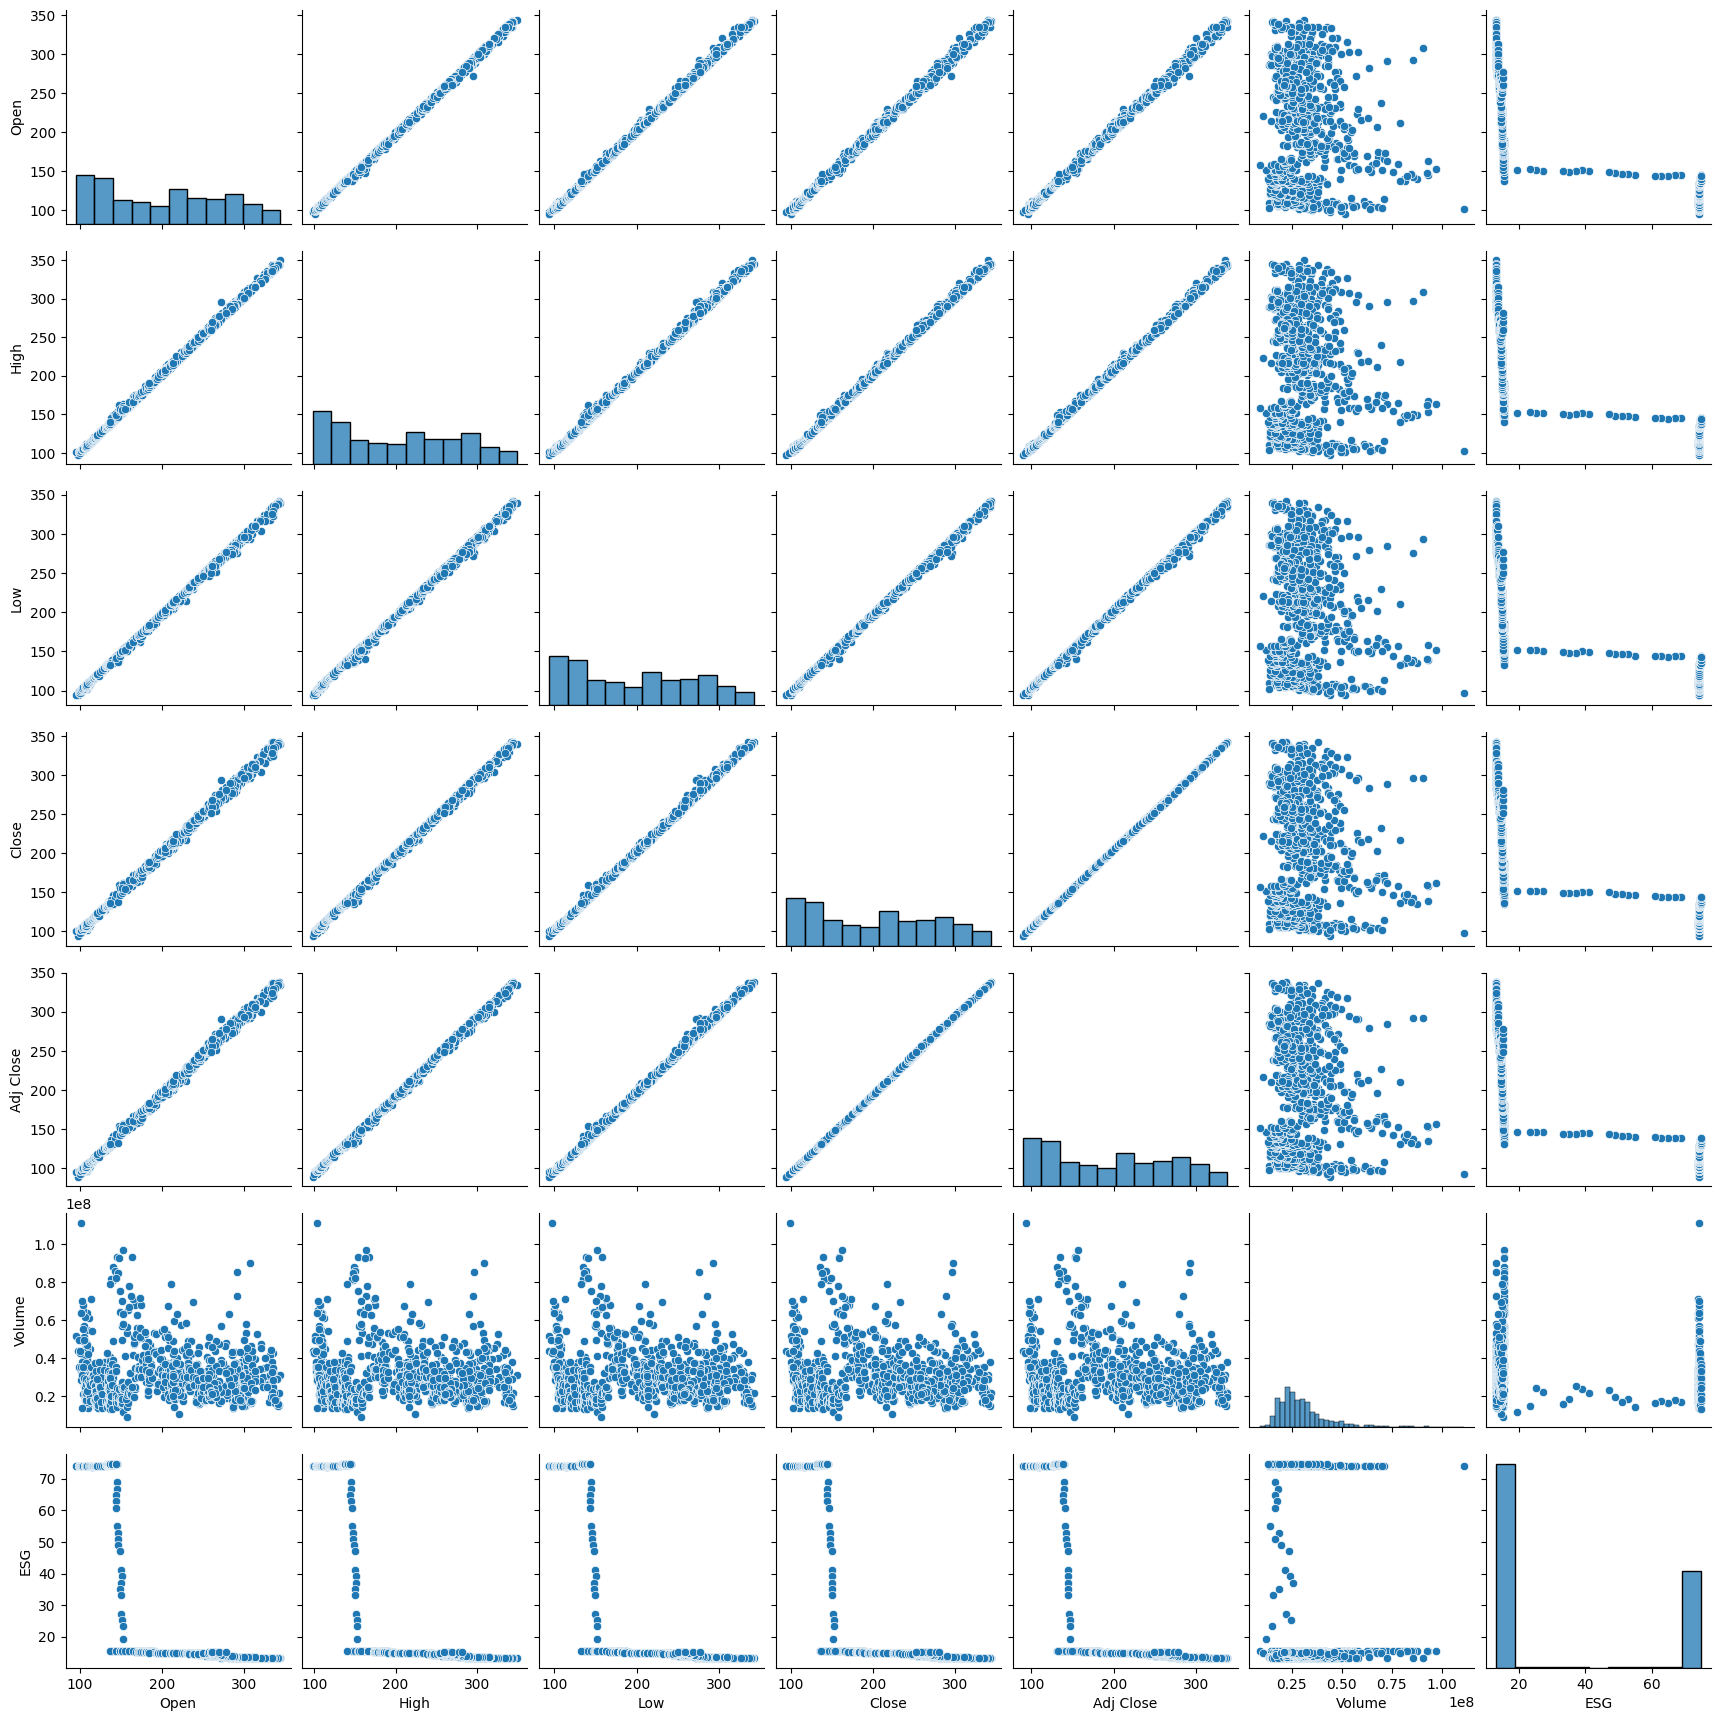

In [79]:
import seaborn as sns
sns.pairplot(merged_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ESG']])
plt.show()

In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

temp = merged_df.copy().drop(['Date'], axis = 1)

temp_esg_col = temp['ESG']

temp.drop('ESG', inplace=True, axis=1)

temp['ESG'] = temp_esg_col

train_test_param = int(0.8 * len(temp))

scaler = MinMaxScaler()
scaler = scaler.fit(temp)
temp_scaled = scaler.transform(temp)

train = temp_scaled[:train_test_param]
test = temp_scaled[train_test_param:]

In [81]:
trainX = []
trainY = []
testX = []
testY = []

n_future = 1
n_past = 7

for i in range(n_past, len(train) - n_future + 1):
  trainX.append(train[i-n_past:i,0:train.shape[1]-1])
  trainY.append(train[i+n_future-1:i+n_future,3])

for i in range(n_past, len(test) - n_future + 1):
  testX.append(test[i-n_past:i,0:test.shape[1]-1])
  testY.append(test[i+n_future-1:i+n_future,3])

In [82]:
np.array(testX).shape

(195, 7, 6)

In [143]:
np.array(testY).shape

(195, 1)

In [138]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import tensorflow as tf

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(np.array(trainX).shape[1],np.array(trainX).shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 7, 64)             18176     
                                                                 
 dropout_4 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________


In [139]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    np.array(trainX), np.array(trainY),
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
40/40 [==============================] - 6s 36ms/step - loss: 0.0145 - val_loss: 0.0050
Epoch 2/100
40/40 [==============================] - 1s 18ms/step - loss: 9.7773e-04 - val_loss: 8.2263e-04
Epoch 3/100
40/40 [==============================] - 1s 17ms/step - loss: 7.2068e-04 - val_loss: 4.8718e-04
Epoch 4/100
40/40 [==============================] - 1s 23ms/step - loss: 6.6073e-04 - val_loss: 6.0274e-04
Epoch 5/100
40/40 [==============================] - 1s 25ms/step - loss: 7.2983e-04 - val_loss: 6.9874e-04
Epoch 6/100
40/40 [==============================] - 1s 16ms/step - loss: 6.5631e-04 - val_loss: 4.7476e-04
Epoch 7/100
40/40 [==============================] - 1s 16ms/step - loss: 6.5121e-04 - val_loss: 4.7249e-04
Epoch 8/100
40/40 [==============================] - 1s 16ms/step - loss: 6.1244e-04 - val_loss: 0.0016
Epoch 9/100
40/40 [==============================] - 1s 16ms/step - loss: 5.8857e-04 - val_loss: 0.0011
Epoch 10/100
40/40 [========================

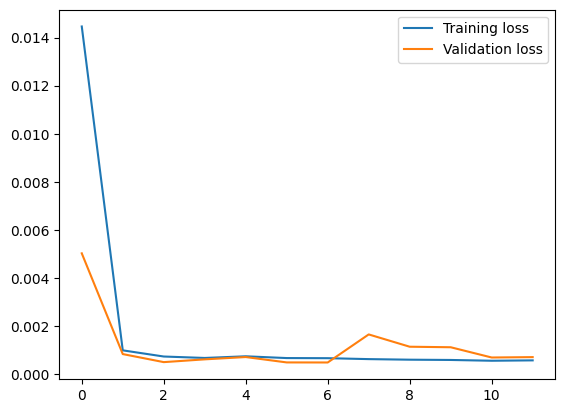

In [140]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

In [146]:
import seaborn as sns
def predict_for_date_ranges(dataset, start, end):
  temp_data = dataset.loc[(dataset['Date'] >= start) & (dataset['Date'] <= end)]
  date_ranges = np.array(temp_data['Date'].iloc[0:len(temp_data)-7])
  temp_data = temp_data.drop('Date', axis=1)
  scaler = MinMaxScaler()
  scaler = scaler.fit(temp_data)
  test_sclaed = scaler.transform(temp_data)
  tempX = []

  n_future = 1
  n_past = 7

  for i in range(n_past, len(test_sclaed) - n_future + 1):
    tempX.append(test_sclaed[i-n_past:i,0:test_sclaed.shape[1]-1])

  predictions = model.predict(np.array(tempX))
  predictions_copies = np.repeat(predictions, test.shape[1], axis=-1)
  y_pred = scaler.inverse_transform(predictions_copies)[:,0]

  prediction_dates = []
  for time_i in date_ranges:
      prediction_dates.append(time_i)

  df_predictions = pd.DataFrame({'Date':np.array(prediction_dates), 'Close':y_pred})
  df_predictions['Date']=pd.to_datetime(df_predictions['Date'])


  original = dataset[['Date', 'Close']]
  original['Date']=pd.to_datetime(original['Date'])
  original = original.loc[(original['Date'] >= start) & (original['Date'] <= end)]

  sns.lineplot(x=original['Date'], y=original['Close'], label='Original')
  sns.lineplot(x=df_predictions['Date'], y=df_predictions['Close'], label='Predicted')

  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.title('Original and predicted Close Price')
  plt.legend()

  plt.xticks(rotation=90)
  plt.tight_layout()
  return plt, predictions

32/32 [==============================] - 1s 13ms/step


<ipython-input-146-aed85ac6589b>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



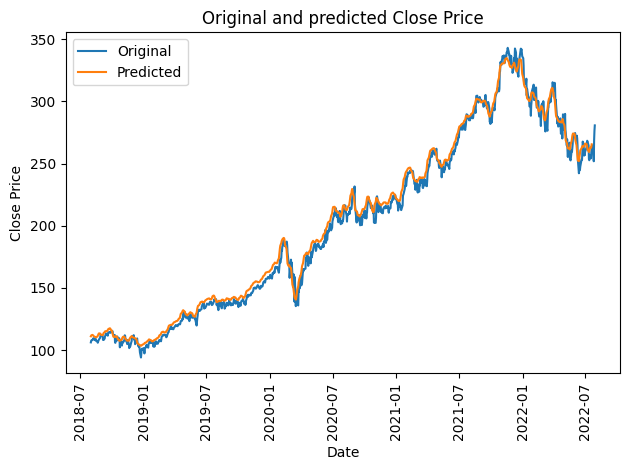

In [147]:
start_date = pd.Timestamp(merged_df['Date'].min())
end_date = pd.Timestamp(merged_df['Date'].max())

plot, predictions = predict_for_date_ranges(merged_df, start_date, end_date)
plot.show()

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(np.array(testX))
mse = mean_squared_error(testY, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(testY, predictions)
r2 = r2_score(testY, predictions)
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)
print('R2 SCORE', r2)

7/7 [==============================] - 0s 5ms/step
MSE 0.001724962033421396
RMSE 0.04153266224818
MAE 0.03436512037271696
R2 SCORE 0.8666864715032934


**Predikcija 2014-2017**

In [150]:
df_main = pd.read_csv('/content/MSFT_2014_2017.csv')

In [151]:
df_main.sort_values(by='Date', inplace=True)
filtered_df = daily_esg[daily_esg.index.isin(df_main['Date'])]
filtered_df = filtered_df.reset_index()
df_main['Date'] = pd.to_datetime(df_main['Date'])
merged_df = pd.merge(df_main, filtered_df, on='Date')
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,ESG
0,2014-11-28,47.950001,48.200001,47.610001,47.810001,41.445053,21534400,66.00
1,2014-12-01,47.880001,48.779999,47.709999,48.619999,42.147221,31191600,66.00
2,2014-12-02,48.840000,49.049999,48.200001,48.459999,42.008526,25773500,66.00
3,2014-12-03,48.439999,48.500000,47.810001,48.080002,41.679115,23534800,66.00
4,2014-12-04,48.389999,49.060001,48.200001,48.840000,42.337921,30320400,66.00
...,...,...,...,...,...,...,...,...
498,2016-11-18,60.779999,61.139999,60.299999,60.349998,55.214470,27686300,71.38
499,2016-11-21,60.500000,60.970001,60.419998,60.860001,55.681065,19652600,71.38
500,2016-11-22,60.980000,61.259998,60.810001,61.119999,55.918934,23206700,71.38
501,2016-11-23,61.009998,61.099998,60.250000,60.400002,55.260212,21848900,71.38


16/16 [==============================] - 0s 5ms/step


<ipython-input-146-aed85ac6589b>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



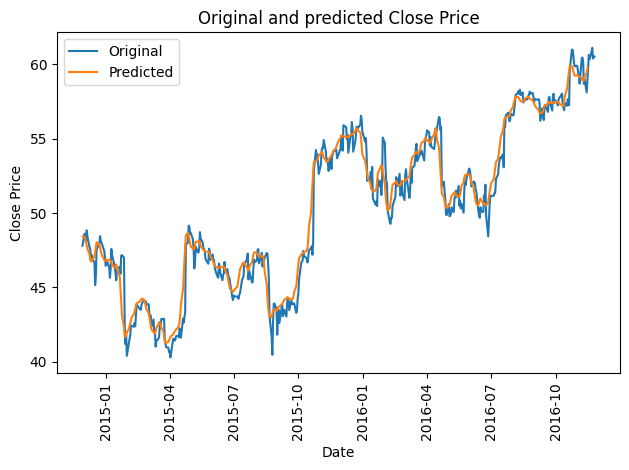

In [152]:
start_date = merged_df['Date'].min()
end_date = merged_df['Date'].max()

plot, predictions_2014_2017 = predict_for_date_ranges(merged_df, start_date, end_date)
plot.show()

2/2 [==============================] - 0s 11ms/step


<ipython-input-146-aed85ac6589b>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



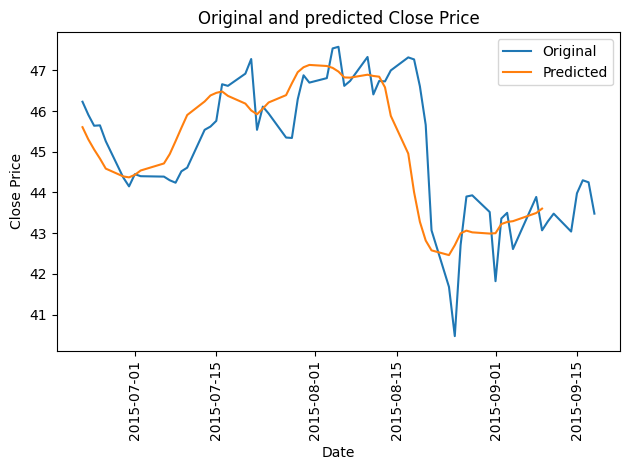

In [153]:
start_date = '2015-06-20'
end_date = '2015-09-20'

plot, predictions_2014_2017 = predict_for_date_ranges(merged_df, start_date, end_date)
plot.show()